# Classifying Likely Purchases for Social Network Ads

By: Matt Purvis

This project will train a KNN algorithm to predict customers that will likely purchase based off of their age and estimated salary. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Import Data

In [10]:
filepath = 'C:\\Users\\v-mpurvis\OneDrive\\Personal Files\\Python Machine Learning Examples\\DataSets-Modules\\'

dataset = pd.read_csv(filepath + 'Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train Test Split

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scale the Features

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and Fit Model

In [12]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2) #Euclidean distance
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluate

In [13]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.73      0.75      0.74        32

    accuracy                           0.83       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100

[[59  9]
 [ 8 24]]


Seventeen observations were misclassified. There were 8 false negatives and 9 false positives. Accuracy was around 83%. The precision is the measure of correctly predicted positive observations over total number of predicted positive observations (24/33) ~ 73%. The recall is the "true positive rate", or when it is actually yes how often does it predict yes (24/32) ~ 75%. The F1 score is the harmonic mean between precision and recall. Therefore, many times, it is a better indicator of model success than just accuracy alone. In this case the f1-score and the accuracy float around 83% which is not as good as the naive bayes results. There are still questions surrounding generalizabilty due to it being a very small dataset. More observations could strengthen the model's predictive power and generalizability.

# The Elbow Method for Choosing K

Text(0, 0.5, 'Error Rate')

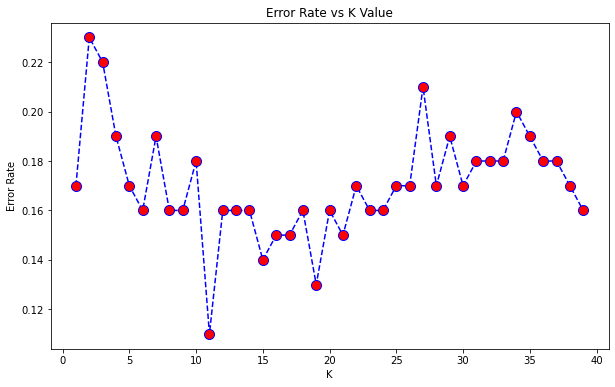

In [18]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))#avg where predictions did not equal actual values #avg error
    
#plotting results
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o'
         ,markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# The optimal value for k seems to be 11. So we will retrain with this value of k and observe the difference.

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



After using the elbow method to choose k, we improved the accuracy from 83% to 89%. The precision improved from 73% to 89%. The recall did not change. Overall, we see by choosing the optimal number for k, we can improve the performance of the algorithm. 